<h1>Sentiment Analysis project<h1>
<h3>Name student1: Kameron Norwood<h3>


In [60]:
import pandas as pd

import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import wordcloud
import matplotlib.pyplot as plt

import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Activation, Dense, Dropout, SpatialDropout1D, Embedding, LSTM

from keras.utils import to_categorical







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h3 align='center'>Data Wrangling <h3>

In [61]:
data = pd.read_csv('/content/customer_review.tsv', sep='\t')


data.head(10)




,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [62]:
data.notnull()





,rating,date,variation,verified_reviews,feedback
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
3145,True,True,True,True,True
3146,True,True,True,True,True
3147,True,True,True,True,True
3148,True,True,True,True,True


In [63]:

print(stopwords.words('english'))

stopwords_list = set(stopwords.words('english'))
data['verified_reviews'] = data['verified_reviews'].apply(lambda word:' '.join([word for word
in word.split() if word not in stopwords_list]))




#print dataset
data.head(10)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes playing game, answer question correc...",1
3,5,31-Jul-18,Charcoal Fabric,"I lot fun thing. My 4 yr old learns dinosaurs,...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received echo gift. I needed another Bluetoo...,1
6,3,31-Jul-18,Sandstone Fabric,"Without cellphone, I cannot use many features....",1
7,5,31-Jul-18,Charcoal Fabric,I think 5th one I've purchased. I'm working ge...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened songs I haven’t heard s...,1


 Love Echo! Loved it! Sometimes playing game, answer question correctly Alexa says got wrong answers you. I like able turn lights away home. I lot fun thing. My 4 yr old learns dinosaurs, control lights play games like categories. Has nice sound playing music well. Music I received echo gift. I needed another Bluetooth something play music easily accessible, found smart speaker. Can’t wait see else do. Without cellphone, I cannot use many features. I iPad see use. It IS great alarm. If u r almost deaf, hear alarm bedroom living room, reason enough keep her.It fun ask random questions hear response. She seem smartbon politics yet. I think 5th one I've purchased. I'm working getting one every room house. I really like features offer specifily playing music Echos controlling lights throughout house. looks great Love it! I’ve listened songs I haven’t heard since childhood! I get news, weather, information! It’s great! I sent 85 year old Dad, talks constantly. I love it! Learning knew thing

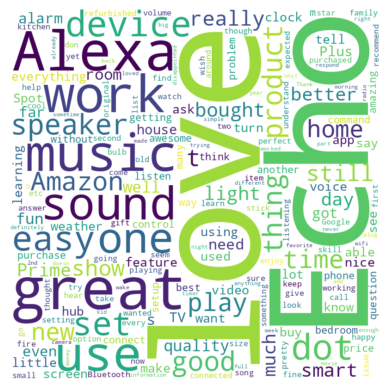

In [64]:
common_words = ' '
for i in data.verified_reviews:
  i = str(i)
  word = i.split()
  common_words += " ".join(word) + " "
print(common_words)

wordcloud = wordcloud.WordCloud(width = 800, height = 800,
background_color = 'white', min_font_size = 10, collocations = False).generate(common_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3 align = "center"> Data Engineering <h3>

In [65]:
Y = data['feedback']

Y = LabelEncoder().fit_transform(Y)

In [66]:
#breakdown each news into words: use Tokenizer and keras
tokenizer = Tokenizer(num_words = 500, split = ' ')
tokenizer.fit_on_texts(data['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data['verified_reviews'].values)

#The length of our tokenized data are not even, lets set each text with the same length.
X = pad_sequences(X)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))

print(X[0:5])




number of rows:3150
number of columns: 226
[[  0   0   0 ...   0   2   4]
 [  0   0   0 ...   0 211   3]
 [  0   0   0 ...  78 299  25]
 [  0   0   0 ... 117   7  40]
 [  0   0   0 ...   0   0   7]]


<h3 align = "center"> Model Design <h3>

In [67]:
model = Sequential()

model.add(Embedding(500, 120, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.4))

model.add(LSTM(176, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 226, 120)          60000     
                                                                 
 spatial_dropout1d_2 (Spati  (None, 226, 120)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 176)               209088    
                                                                 
 dense_2 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3 align = "center"> Data Splitting (Training/Testing) <h3>

In [68]:
Y = to_categorical(Y)


In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print("Number of samples for training [news]:{}\nNumber of sample for training [Labels]:{}".format(X_train.shape,y_train.shape))
print("Number of samples for testing [news]:{}\nNumber of sample for testing [Labels]:{}".format(X_test.shape,y_test.shape))



Number of samples for training [news]:(2520, 226)
Number of sample for training [Labels]:(2520, 2)
Number of samples for testing [news]:(630, 226)
Number of sample for testing [Labels]:(630, 2)


<h3 align = "center"> Training the Model <h3>

In [70]:
model.fit(X_train, y_train, epochs= 5, batch_size= 32, verbose= 'auto')

Epoch 1/5
79/79 [==============================] - 87s 1s/step - loss: 0.3081 - accuracy: 0.9071
Epoch 2/5
79/79 [==============================] - 82s 1s/step - loss: 0.2149 - accuracy: 0.9214
Epoch 3/5
79/79 [==============================] - 81s 1s/step - loss: 0.1612 - accuracy: 0.9381
Epoch 4/5
79/79 [==============================] - 82s 1s/step - loss: 0.1198 - accuracy: 0.9552
Epoch 5/5
79/79 [==============================] - 80s 1s/step - loss: 0.0964 - accuracy: 0.9643


<h3 align = "center"> Evaluate your Model <h3>

In [71]:
# Evaluating the model
feedback_prediction = model.predict(X_test)
predicted_inverse = np.argmax(feedback_prediction,axis=1)
y_test_inverse = np.argmax(y_test,axis=1)

20/20 [==============================] - 3s 124ms/step


In [72]:
# Evaluate out model using the accuracy metric
loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.919


<h3 align = "center"> Performed Evaluation <h3>

In [73]:
target_name = ["Class {}".format(i) for i in range(2)]

print(classification_report(y_test_inverse, predicted_inverse, target_names = target_name))

              precision    recall  f1-score   support

     Class 0       0.45      0.38      0.41        47
     Class 1       0.95      0.96      0.96       583

    accuracy                           0.92       630
   macro avg       0.70      0.67      0.69       630
weighted avg       0.91      0.92      0.92       630



<h3 align = "center"> Client Program <h3>

In [74]:
def processing_review(user_review):
  # Create a set of stop words
  stop_words = set(stopwords.words('english'))


  tokenizer = Tokenizer(num_words = 500, split = ' ')
  review_words = [word.lower() for word in nltk.word_tokenize(user_review) if word.isalpha() and word.lower() not in stop_words]

  tokenizer.fit_on_texts(review_words)
  review_seq = tokenizer.texts_to_sequences([review_words])


  review_pad = pad_sequences(review_seq)

  return review_pad


In [75]:
print("Provide a review for this product: ")
user_input = input()



Provide a review for this product: 
This item is great!


In [76]:
Pro = processing_review(user_input)

In [77]:


sentiment_review = model.predict(Pro)

sentiment_prediction = np.argmax(sentiment_review)



if sentiment_prediction == 0:
  print("This review is negative")
else:
  print("This review is positive")

1/1 [==============================] - 0s 287ms/step
This review is positive
